In [3]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [1]:
import pickle as pkl
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
f = open('processed_data.pkl','rb')
processed_data = pkl.load(f)
f.close()

f = open('processed_labels.pkl','rb')
processed_labels = pkl.load(f)
f.close()

X_train, X_test, y_train, y_test = train_test_split(processed_data, processed_labels, test_size=0.2, random_state=42)

In [3]:
X_train = X_train[..., np.newaxis]  # Add a channel dimension
X_test = X_test[..., np.newaxis]

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [7]:
# Original classes
original_classes = label_encoder.classes_

print("Original classes:", original_classes)

# Mapping of encoded labels to original classes
for encoded_label in range(len(original_classes)):
    print(f"{encoded_label} -> {original_classes[encoded_label]}")


Original classes: ['American Robin' "Bewick's Wren" 'Northern Cardinal'
 'Northern Mockingbird' 'Song Sparrow']
0 -> American Robin
1 -> Bewick's Wren
2 -> Northern Cardinal
3 -> Northern Mockingbird
4 -> Song Sparrow


In [54]:
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.1, random_state=42)

In [55]:
X_train_shuffled.shape

(4337, 13, 130, 1)

In [62]:
from tensorflow.keras.optimizers import Adam
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(13, 130, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.00001)
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, batch_size=64,
                    steps_per_epoch=int(len(X_train) / 32),
                    epochs=22,
                    validation_data=(X_valid, y_valid))#,callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4281 - loss: 1.3017 - val_accuracy: 0.6152 - val_loss: 0.9420
Epoch 2/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6316 - loss: 0.9212 - val_accuracy: 0.6820 - val_loss: 0.8267
Epoch 3/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6792 - loss: 0.8063 - val_accuracy: 0.7097 - val_loss: 0.7290
Epoch 4/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7236 - loss: 0.7064 - val_accuracy: 0.7212 - val_loss: 0.6604
Epoch 5/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7606 - loss: 0.6323 - val_accuracy: 0.7419 - val_loss: 0.6124
Epoch 6/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7918 - loss: 0.5604 - val_accuracy: 0.7488 - val_loss: 0.5794
Epoch 7/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8116 - loss: 0.4917 - val_accuracy: 0.7926 - val_loss: 0.5325
Epoch 8/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8522 - loss: 0.4213 - val_accu

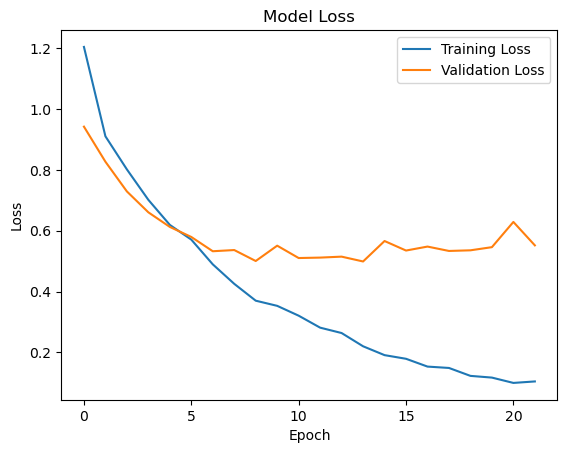

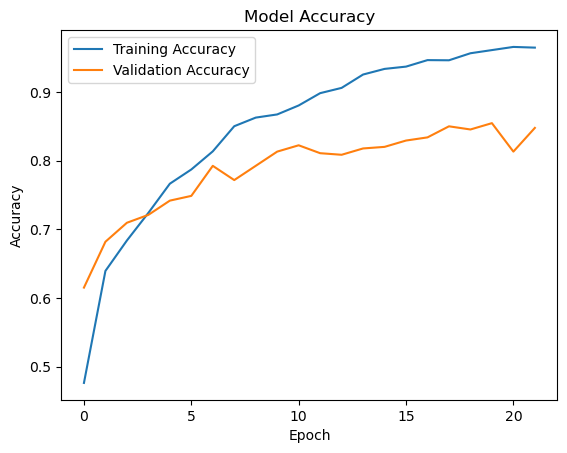

In [63]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
from keras.models import load_model

from keras.models import save_model

# Assuming cnn_model is your trained CNN model
save_model(model, 'cnn_model.keras')

f = open('history.pkl','wb')
pkl.dump(history,f)
f.close()

In [5]:
from keras.models import load_model
cnn_model = load_model(r'C:\\Users\\mirot\\Documents\\Data_Science\\Bird_App\\cnn_model.keras')

C:\Users\mirot\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
print(X_test.shape)
print(y_test_encoded.shape)

(1085, 13, 130, 1)
(1085,)


In [16]:
predicted_probabilities = cnn_model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [22]:
confidences = []
for sample in predicted_probabilities:
    confidences.append(np.max(sample))

In [23]:
confidences[:10]

[0.99702483,
 0.5454041,
 0.98836714,
 0.9994355,
 0.9999455,
 0.9202958,
 0.41265976,
 0.58493394,
 0.99987626,
 0.5767024]

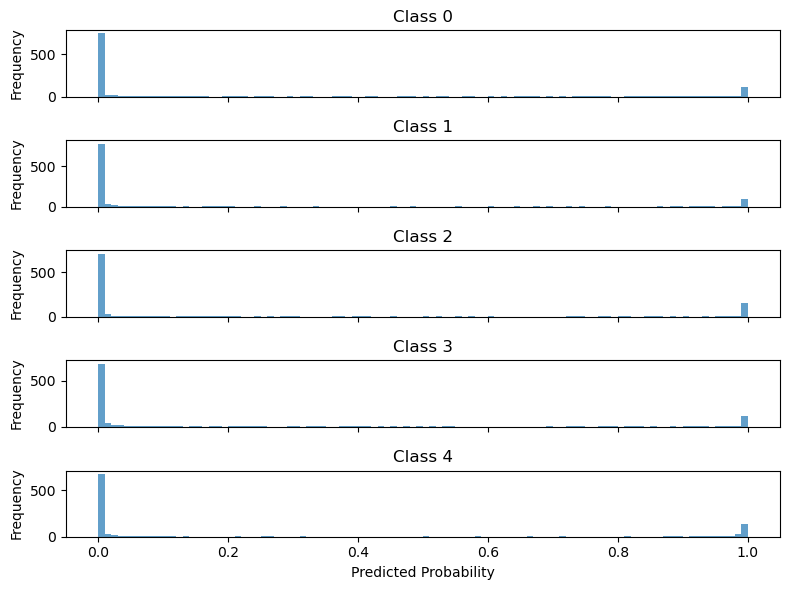

In [18]:
num_classes = predicted_probabilities.shape[1]
fig, axs = plt.subplots(num_classes, 1, figsize=(8, 6), sharex=True)
for class_idx in range(num_classes):
    axs[class_idx].hist(predicted_probabilities[:, class_idx], bins=100, alpha=0.7)
    axs[class_idx].set_title(f'Class {class_idx}')
    axs[class_idx].set_ylabel('Frequency')
plt.xlabel('Predicted Probability')
plt.tight_layout()
plt.show()

In [68]:
### FOR SPECTROGRAMS

f = open('processed_spec.pkl','rb')
processed_spec = pkl.load(f)
f.close()

f = open('processed_labels.pkl','rb')
processed_labels = pkl.load(f)
f.close()

X_train, X_test, y_train, y_test = train_test_split(processed_spec, processed_labels, test_size=0.2, random_state=42)

X_train = X_train[..., np.newaxis]  # Add a channel dimension
X_test = X_test[..., np.newaxis]

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.1, random_state=42)

In [20]:
X_train.shape

(3903, 1025, 130, 1)

In [22]:
# Define CNN model
model_spec = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(1025, 130, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.00001)
# Compile the model
model_spec.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Train the model
history_spec = model_spec.fit(X_train, y_train, batch_size=32,
                    #steps_per_epoch=int(len(X_train) / 32),
                    epochs=25,
                    validation_data=(X_valid, y_valid))#,callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model_spec.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 461s 4s/step - accuracy: 0.4152 - loss: 17.1309 - val_accuracy: 0.6290 - val_loss: 0.9457
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 484s 4s/step - accuracy: 0.7484 - loss: 0.6967 - val_accuracy: 0.6912 - val_loss: 0.8133
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 470s 4s/step - accuracy: 0.8762 - loss: 0.3618 - val_accuracy: 0.6682 - val_loss: 0.8757
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 463s 4s/step - accuracy: 0.9345 - loss: 0.2034 - val_accuracy: 0.6843 - val_loss: 0.9311
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 467s 4s/step - accuracy: 0.9475 - loss: 0.1575 - val_accuracy: 0.6843 - val_loss: 1.2708
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.9668 - loss: 0.1180 - val_accuracy: 0.6866 - val_loss: 1.2184
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 465s 4s/step - accuracy: 0.9682 - loss: 0.1217 - val_accuracy: 0.6820 - val_loss: 1.4178
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 464s 4s/step - accuracy: 0.9764 - loss: 0.0887 - val_acc

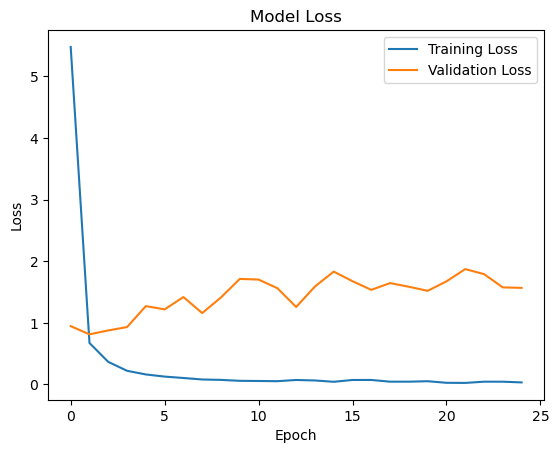

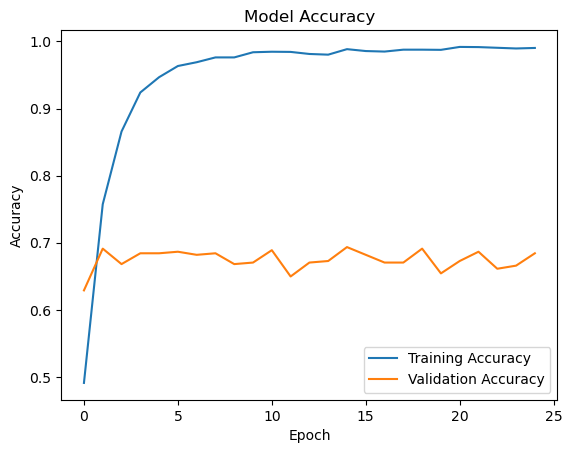

In [23]:
# Plot training & validation loss
plt.plot(history_spec.history['loss'], label='Training Loss')
plt.plot(history_spec.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_spec.history['accuracy'], label='Training Accuracy')
plt.plot(history_spec.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, processed_labels, test_size=0.2, random_state=42)


# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.1, random_state=42)
# Reshape X_train
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [36]:
##RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4433179723502304
